Estudiante: Andres Viscaino
# Covid-19 infección en Ecuador. Modelos matemáticos y predicciones
Una comparación de modelos, lineal, polilnomico,logísticos y exponenciales aplicados a la infección por el virus Covid-19

Se realiza un análisis matemático simple del crecimiento de la infección en Python y dos modelos para comprender mejor la evolución de la infección.

Se crea modelos de series temporales del número total de personas infectadas hasta la fecha (es decir, las personas realmente infectadas más las personas que han sido infectadas). Estos modelos tienen parámetros , que se estimarán por ajuste de curva.

# Para este caso usaremos:
estos datos de recuperacion actualizados
https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv

In [2]:
import math
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#DATOS COVID 
#Actualizar los datos (URL)
url = 'time_series_covid19_recovered_global.csv'

df = pd.read_csv(url)
df = df.replace(np.nan, 0)
df=df.loc[df['Country/Region'] == 'Ecuador']
df=df.iloc[0,:]
df=pd.DataFrame(df.values, columns = ["casos"])
df

casos
0          0
1    Ecuador
2    -1.8312
3   -78.1834
4          0
..       ...
285   141759
286   141759
287   141759
288   149048
289   149048

[290 rows x 1 columns]

In [76]:
y=list((df['casos'][62:]))
x=list(range(0,len(y)))
#print(len(y))
#print(len(x))
#print(y)
#print(x)

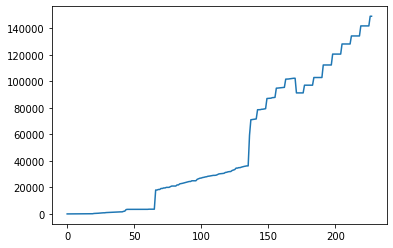

In [40]:
plt.plot(x,y)

In [55]:
y=list((df['casos'][62:]))
x=list(range(0,len(y)))
x.pop(0)
y.pop(0)
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
print(len(x))
print(len(y))
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

227
227
Coefficients: 
 [702.79752918]
Independent term: 
 -28348.323613114502


In [56]:
#Vamos a comprobar:
# Quiero predecir cuántos "Casos" voy a obtener por en el dia 100,
# según nuestro modelo, hacemos:
y_prediccion = regr.predict([[100]])
print(int(y_prediccion))

41931


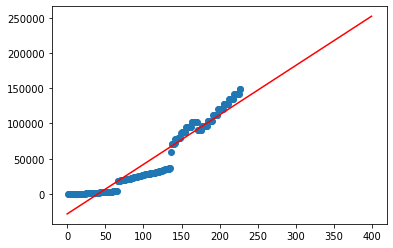

In [57]:
#Graficar
plt.scatter(x, y)
x_real = np.array(range(0, 400))
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='red')
plt.show()

### Modelo Logistico

In [75]:
#El modelo logistico
exp_fit=0
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)

TypeError: 'numpy.ndarray' object is not callable

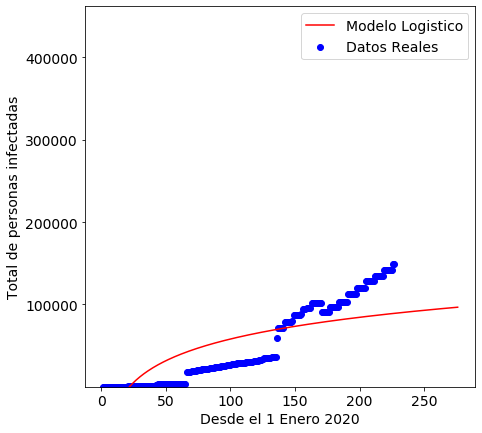

In [59]:
pred_x = list(range(min(x),max(x)+50)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="blue")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico", color='red')
plt.legend()
plt.xlabel("Desde el 1 Enero 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y
plt.show()

### Modelo exponencial

[0.03438684 5.67809597]


D:\Python\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


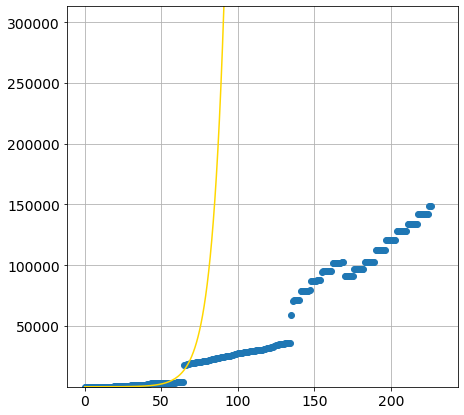

In [78]:

y1=list((df['casos'][63:]))
x1 = np.array(range(0,len(y1)))
pred_x = np.array(list(range(min(x1),max(x1)+7)))
xd = np.log(x1)
yd = np.log(y1)
##Ajuste polinomial
curve_fit = np.polyfit(x1,yd, deg=1)
print(curve_fit)
yx = np.exp(1.74) * np.exp(0.12*pred_x)
plt.plot(x1, y1, "o")
plt.plot(pred_x, yx, color='gold')
plt.ylim((min(y1)*0.9,max(y1)*2.1)) # Definir los limites de Y
plt.grid(True)

### Modelo polinomial

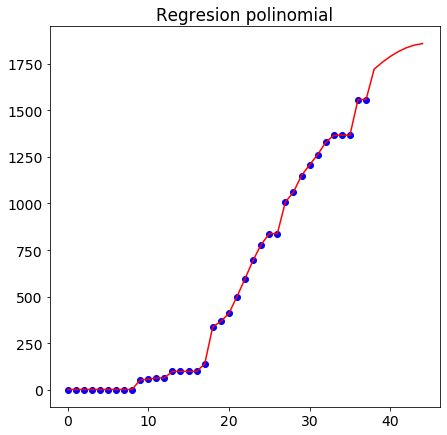

In [77]:
y = list((df['casos'][63:]))
#print(y)
y1=y[1:39]
x1 = np.array(range(0,38)).reshape(-1, 1)

lin = LinearRegression() 
lin.fit(x1, y1) 
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(x1) 

poly.fit(X_poly, y1) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y1) 
plt.scatter(x1, y1, color = 'blue') 
X1 =  np.array(range(40,47)).reshape(-1, 1)
pre = lin2.predict(poly.fit_transform(X1))
for i in pre:
    y1.append(i)
x2=np.array(range(0,45))    
plt.plot(x2, y1, color = 'r') 
plt.title('Regresion polinomial') 
plt.show()

# Analisis
Al revisar las graficas de todos los modelos podemos observar que el modelo polimonial a que más se ajusta a las predicicones de casos de covid en el país existentes actualmente,por otra parte, la gráfica del modelo polinomial se ajusta en menor medida.

# Conclusiones
Los modelos de regresión exponencial como polinomial, usan métodos distintos para predecir el valor de una variable en función de otro valores asignados a otra variable, para asi mejorar el ajuste del modelo y posteriormente analizar la precisión del mismo. Sin embargo el uso de los modelos de regresión de forma general dependera únicamente del caso que se vaya a analizar. Estos modelos de análisis son un proceso estadístico para estimar las relaciones entre variables. Más específicamente, el análisis de regresión ayuda a entender cómo el valor de la variable dependiente varía al cambiar el valor de una de las variables independientes, manteniendo el valor de las otras variables independientes fijas. El desempeño de los métodos de análisis de regresión en la práctica depende de la forma del proceso de generación de datos, y cómo se relaciona con el método de regresión que se utiliza.
# Criterio personal (politico, economico y social de la situacion)
La pandemia hasta el dia de hoy a resultado un gran cambio tanto social como economico, desde que entro el estado de excepcion en nuestro pais, Por otro lado el gobierno a tratado de imponer medidas de seguridad y precaución para evitar que el virus se expanda y que como resultado no ha generado más que controversia por porte de las mismas personas.Aun que hablando del ambito politico.

# Referencias

https://www.researchgate.net/publication/340092755_Infeccion_del_Covid-19_en_Colombia_Una_comparacion_de_modelos_logisticos_y_exponenciales_aplicados_a_la_infeccion_por_el_virus_en_Colombia
https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/
https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv